# Cen X-3 Analysis

In this notebook we’ll analyze an XMM-Newton lightcurve of Cen X-3 taking during orbital phases ≈ 0.37 – 0.82. We’ll use the **dipspeaks** package to detect and evaluate high-confidence peaks and dips, then perform a detailed comparison.

To get the most out of our tools, we’ll split the lightcurve into two energy bands:
- **Low energy**: 0.2 – 3 keV  
- **High energy**: 3 – 10 keV  

We'll process each band separately and then compare the resulting features.  


In [1]:
#LOAD PACKAGES
import dipspeaks
from dipspeaks import *



If you need help, contact graciela.sanjurjo@ua.es.



## Detection

The main function is **detect_dips_and_peaks**. This function will detect and evaluate significant peaks and dips (features) that appear in alightcurve.

We should provide the path to the light curve, a signal to noise in which we desire to rebin it, the indexes of the columns in case is an ascci file and weather we want or not see the plots as the process runs.

### Workflow:

- Detect all peaks and dips

- Create synthetic data with the same statistical properties as the original ligt curve

- Train autoencoders on syntetich data to get out model to recognize the patters that appear in syntetic data.

- Evaluate both the features detected in the light curve  and in the syntetic ligh curve

After the evaluation, if in the dataset a feature is flagged as an outlier (controlled via zscore and percentile_error with respect to the syntetic dataset) we will consider it to be a high probability feature. 
The rate (features/s) of both the synthetic dataset and dataset after the filtering will be compared to evaluate the reliability of the result.
  
#### We will obtain:

- raw detected peaks data frame
  
- raw detected dips data frame
  
- Rebined lightcurve

  
- raw detected peaks on synthetic data

  
- raw detected dips on synthetic data.

If show_plot=True, as the process goes by some plots will be displayed, and finally, the higher probability peaks and dips will be shown. 

For flexibity, the raw complete data will be probided, so before making the analysis, we should first filter it.

Creating syntetic data
- done!
Rebin light curve and syntetic lightcurve to the desired sn
Done!
Calculate bases for dip/peak detection
- done!
- detecting dips and peaks within light curve and syntetic lightcurve
- done!


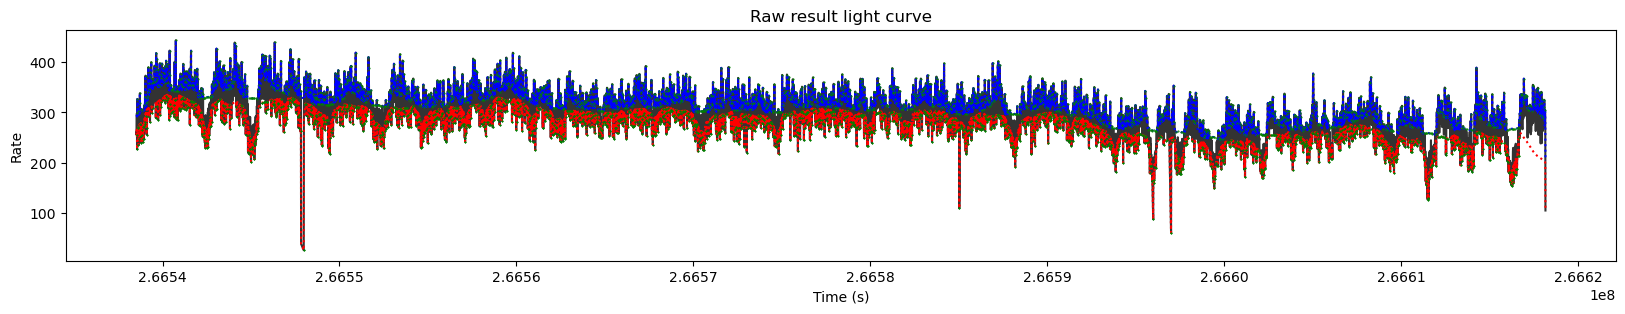

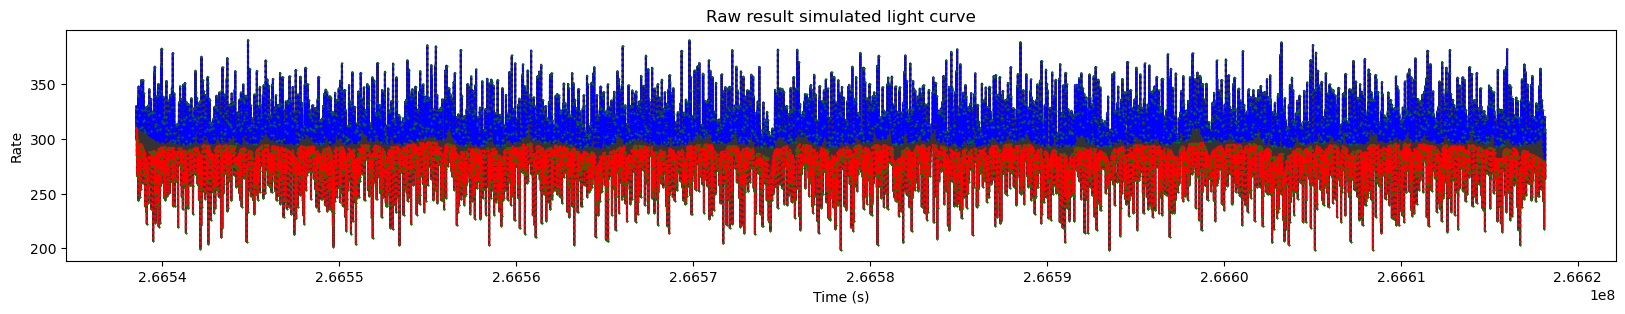

Train auto-encoders in syntetic data
DIPS----------------------------------------------------------------------------------------


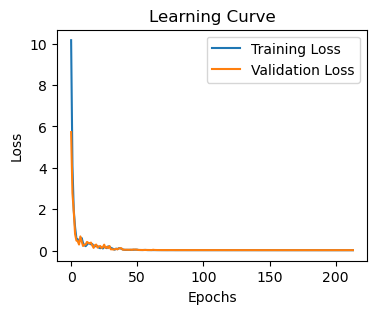

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


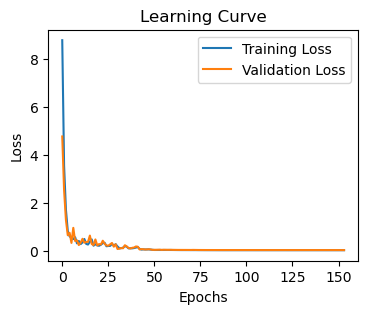

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
PEAKS---------------------------------------------------------------------------------------


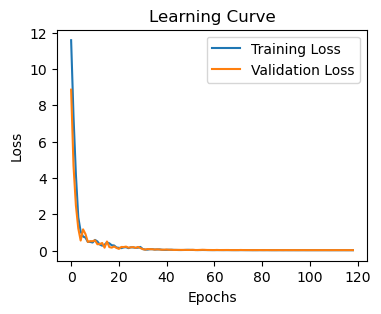

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step


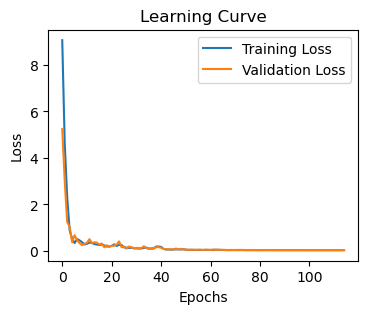

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
Simulation:
Peaks per second: 0.0003 percentage of rejected peaks: 0.99
Dips per second: 0.0003 percentage of rejected dips: 0.9897
Result:
Peaks per second: 0.0031 percentage of rejected peaks: 0.8858 probability of detected peaks: 1.0
Dips per second: 0.0025 percentage of rejected dips: 0.8994 probability of detected dips: 0.9


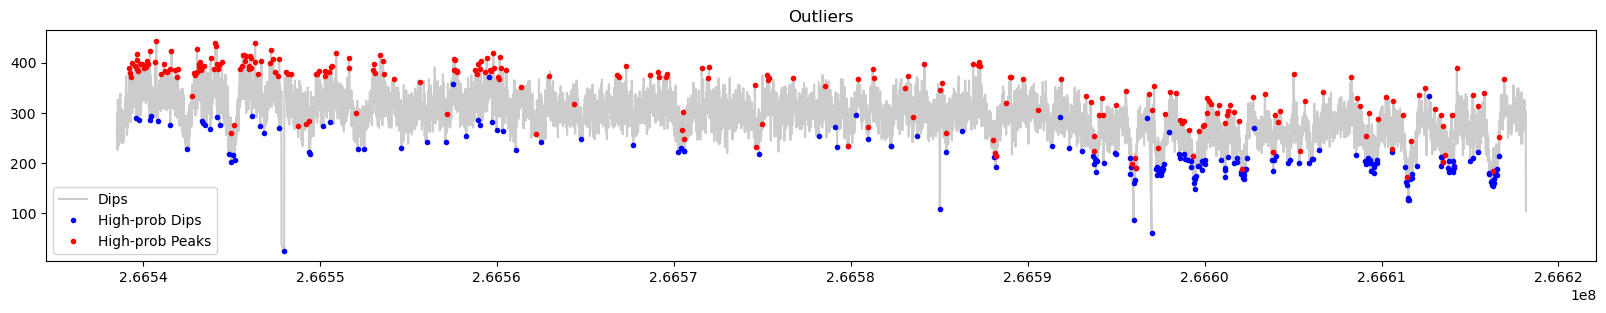

Creating syntetic data
- done!
Rebin light curve and syntetic lightcurve to the desired sn
Done!
Calculate bases for dip/peak detection
- done!
- detecting dips and peaks within light curve and syntetic lightcurve
- done!
Train auto-encoders in syntetic data
DIPS----------------------------------------------------------------------------------------
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
PEAKS---------------------------------------------------------------------------------------
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
Simulation:
Peaks per second: 0.0003 percentage of rejected peaks: 0.9899
Dips per second: 0.0003 percentage of rejected dips: 0.9897
Result:
Peaks per second: 0.003 percentage of rejected peaks: 0.8952 probability of detected 

In [2]:
high_lc="./high"
low_lc="./low"

high_peaks_to_clean, high_dips_to_clean, high_lcreb, high_speaks_to_clean, high_sdips_to_clean = detect_dips_and_peaks(high_lc, snr=0.1 ,index_time=0, index_rate=1, index_error_rate=2, num_simulations=1, show_plot = True)
low_peaks_to_clean, low_dips_to_clean, low_lcreb, low_speaks_to_clean, low_sdips_to_clean = detect_dips_and_peaks(low_lc, snr=0.1 ,index_time=0, index_rate=1, index_error_rate=2, num_simulations=1, show_plot = False)

### Filter

To perform the analysis we should filter our peaks and dips, to that end, we will use the function **filter_dip_peak** and if needed, mofify the 
error_percentile_threshold and zscore_threshold (default is percetile >= 99% and zscore >= 4). 

The same filters are applied to the syntetic dataset. The rates of detection of the real and synthetic data will be compared to provide a probability of the filtered set.

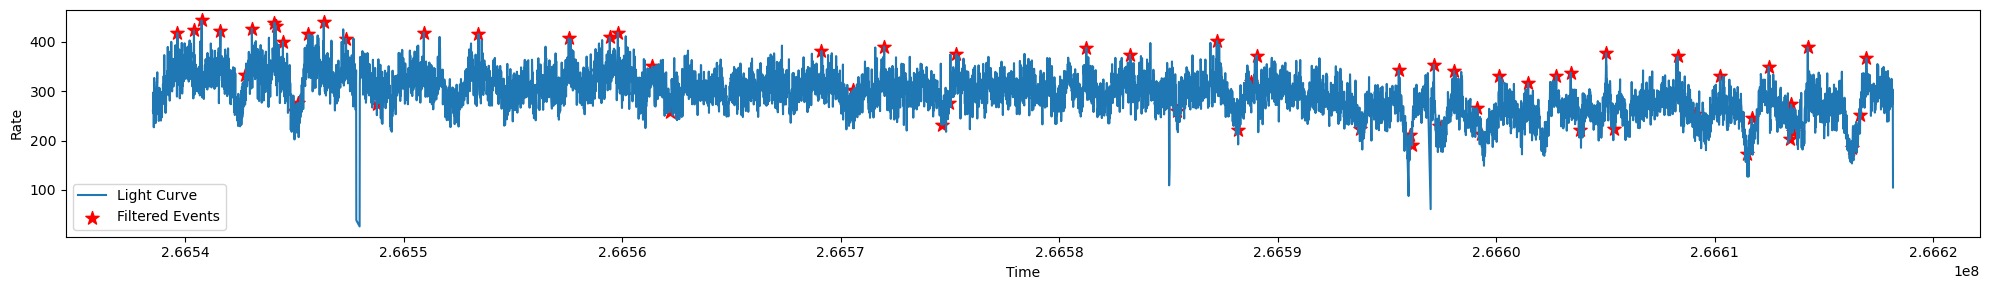

The probability of this filtered dataset is 0.9546
The probability of this filtered dataset is 0.9663


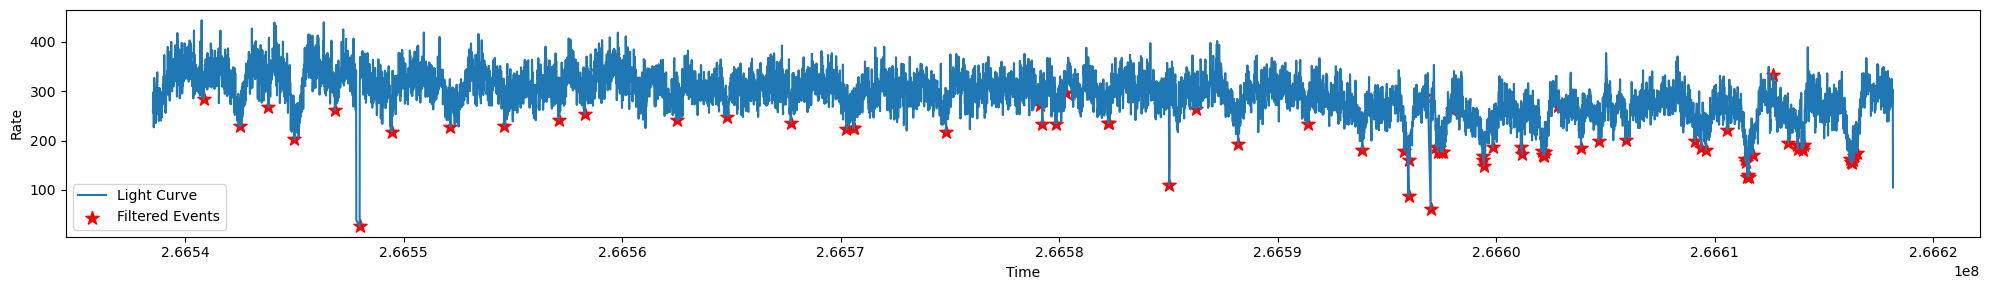

The probability of this filtered dataset is 0.9622
The probability of this filtered dataset is 0.9444


In [3]:
high_peaks = filter_dip_peak(high_peaks_to_clean,
                       high_speaks_to_clean,
                       high_lcreb,
                       error_percentile_threshold=0.999,
                       zscore_threshold=3,
                       show_plot=True)

low_peaks = filter_dip_peak(low_peaks_to_clean,
                       low_speaks_to_clean,
                       low_lcreb,
                       error_percentile_threshold=0.999,
                       zscore_threshold=3,
                       show_plot=False)

high_dips = filter_dip_peak(high_dips_to_clean,
                       high_sdips_to_clean,
                       high_lcreb,
                       error_percentile_threshold=0.999,
                       zscore_threshold=3,
                       show_plot=True)

low_dips = filter_dip_peak(low_dips_to_clean,
                       low_sdips_to_clean,
                       low_lcreb,
                       error_percentile_threshold=0.999,
                       zscore_threshold=3,
                       show_plot=False)

We can further filter the datasets as required. In this case, we will driop events of duration > 5000 s.

In [4]:
#Time filter
high_peaks = high_peaks[high_peaks.duration<5000].reset_index(drop=True)
low_peaks = low_peaks[low_peaks.duration<5000].reset_index(drop=True)
high_dips = high_dips[high_dips.duration<5000].reset_index(drop=True)
low_dips = low_dips[low_dips.duration<5000].reset_index(drop=True)

## ANALYSIS

Now we will use some functions that help us to analyse the high probability dips and peaks that we obtained. 

- Search for clump candidates: clumps are overdense and cold structures in the stellar wind. If the radiation threspasses them is expected to observe dips with higher prominence in the low energy than in the high energy range. **clump_candidates** search for these eventes and plots an histogram over the lighrcurve of those candidates.

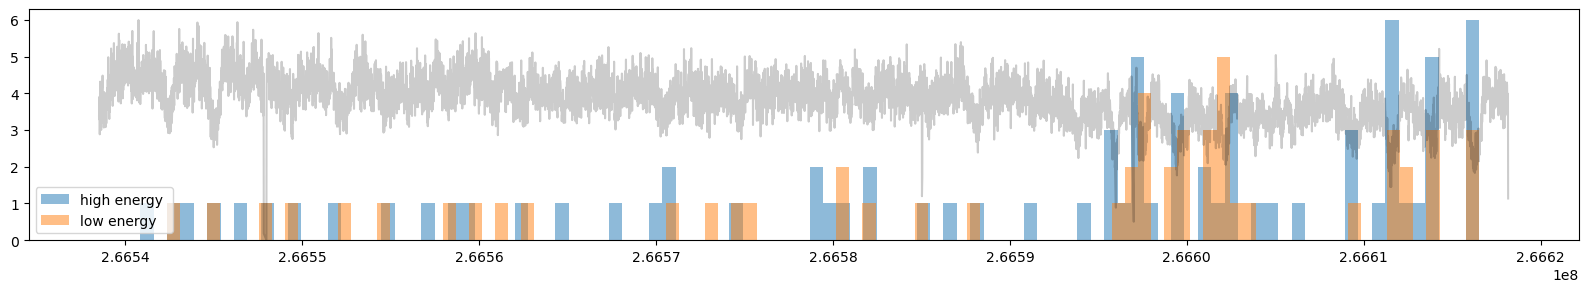

In [5]:
hclump, lclump = clump_candidates(high_dips,low_dips,high_lcreb,overlap_threshold=0.6, show_plot=True)

- Some very prominent dips are present in the ligt curve, lets try to group them in different types. **gmm_dips_peaks** is a function that classifies our high probability candidates by duration and prominence and plots it onto the light curve.

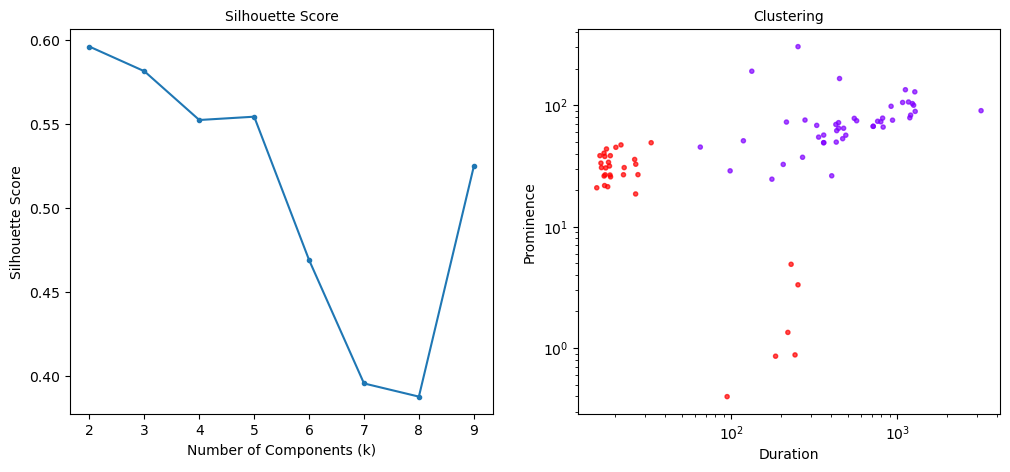

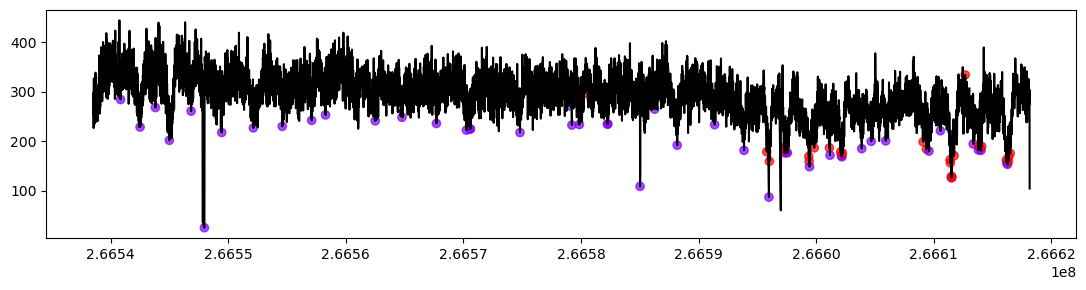

,Cluster,Number,Mean_prominence,Mean_duration,Std_prominence,Std_duration
0,0,45,79.809,656.105,47.568,534.480
1,1,32,26.608,54.382,14.194,76.359


In [6]:
dip_cluster_stats, dip_labels = gmm_dips_peaks(high_dips,high_lcreb, log_scale=True, show_plot=True)

As we see, there are three goups of dips showinf a high Silhouette score. In https://arxiv.org/abs/2012.11683 prominent dips were suggested to be formed by the interaction of the NS magnetosphere with the acretion disc

- Lets see if the peaks in the dataset tend to overlap in the high and low energy range. To that end, we unse the function **overlap**, which provides the overlap duration, the indexes of the datasets in which overlap occurs and the percentage of overlap for each of the events. As an example, we can consider an overlap if the high and low energy range at least the 75% of their duration.

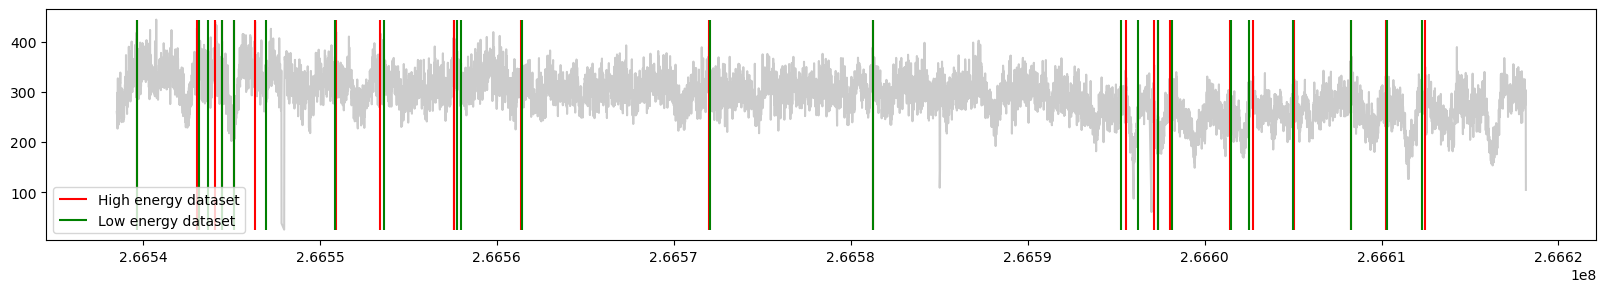

In [7]:

overlap_s, high_index, low_index, high_ov_per, low_ov_per = overlap_percentaje(high_peaks,low_peaks,high_lcreb, percentaje=0.5,show_plot=True)


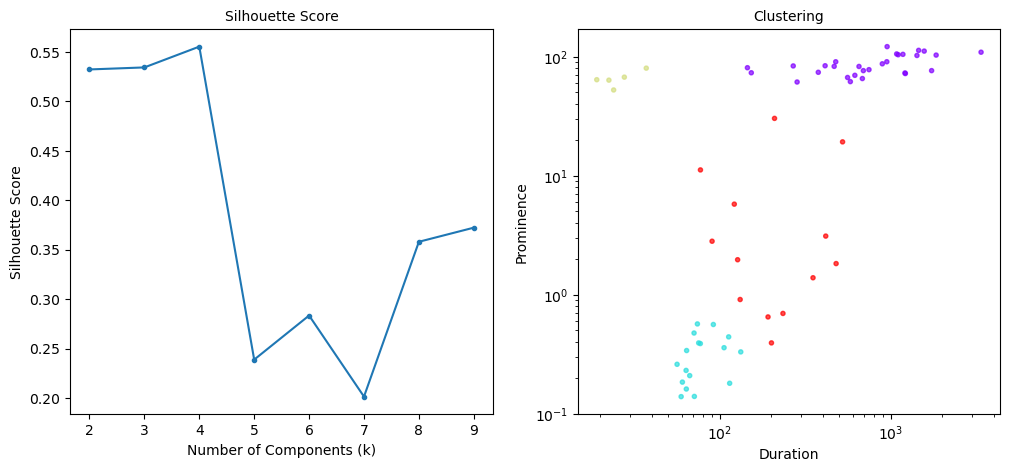

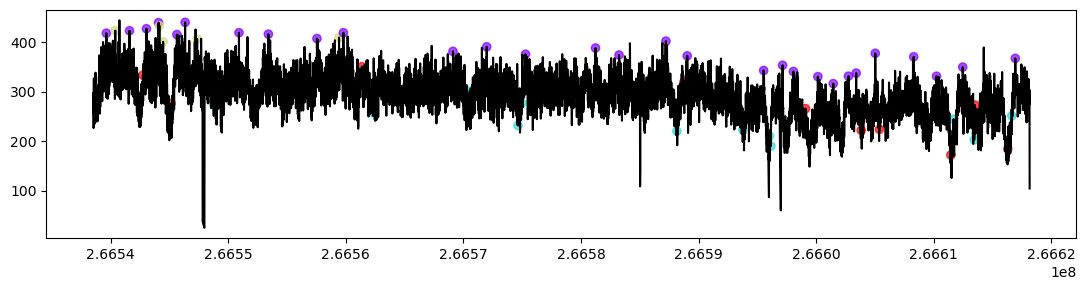

,Cluster,Number,Mean_prominence,Mean_duration,Std_prominence,Std_duration
0,0,29,86.300,935.720,16.944,664.596
1,1,17,0.315,79.946,0.142,22.921
2,2,5,65.443,26.041,9.890,6.924
3,3,13,6.166,242.611,9.028,150.962


In [8]:
peak_cluster_stats, peak_labels = gmm_dips_peaks(high_peaks,high_lcreb, log_scale=True, show_plot=True)

## EVERYTHING TOGETHER

To finish, we collect in the following plot high probability peaks and those dips that were associated with NS/disc iteration and those that could be clump candidates.


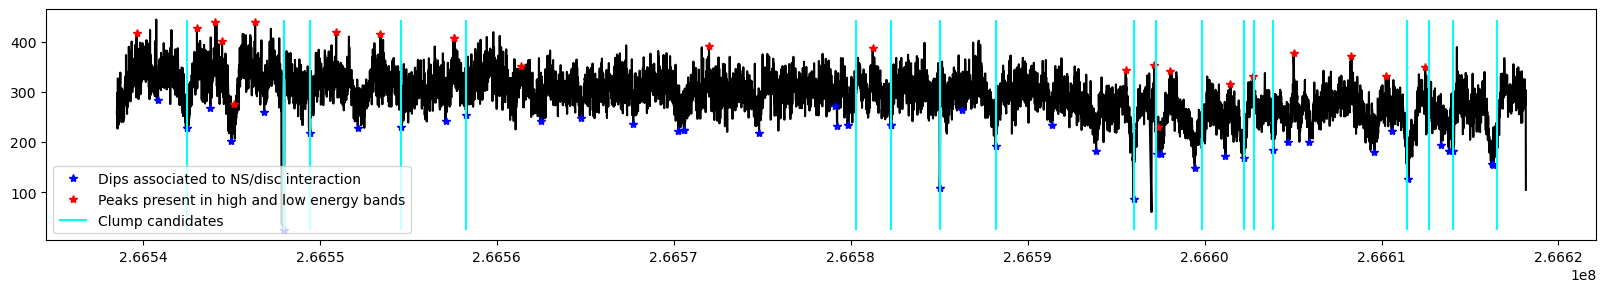

In [9]:
long_dip_cluster = dip_cluster_stats.Cluster[np.argmax(dip_cluster_stats.Mean_duration)] #Dips associated with interactions with the magnetosphere

plt.figure(figsize=(20, 3))
plt.plot(high_lcreb.t, high_lcreb.c,"k")
#plt.plot(high_dips.t,high_lcreb.c[high_dips.pos],"go")
plt.plot(high_dips.t[dip_labels==long_dip_cluster],high_lcreb.c[high_dips.pos][dip_labels==long_dip_cluster],"*b", label="Dips associated to NS/disc interaction")

plt.plot(high_peaks.t[high_index],high_lcreb.c[high_peaks.pos[high_index]],"*r", label="Peaks present in high and low energy bands")

plt.vlines(x=hclump.t, ymin=min(high_lcreb.c), ymax=max(high_lcreb.c), label="Clump candidates", color="cyan")
plt.legend()